In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/automotive.txt')

# set time index
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')

# print data columns
for x in data.columns:
    print(x)

# fill in NaNs - forward fill
data.fillna(method='ffill',inplace=True)
# fill in NaNs - backward fill
data.fillna(method='bfill',inplace=True)

# Remove last column with no column heading
del data['Unnamed: 22']

# remove columns that match keywords
for dc in data.columns:
    if ("Average" in dc) or ("(total)" in dc) \
       or ("$" in dc) or ("(mA)" in dc):
        del data[dc]

data.head()

Average fuel consumption (MPG)
Average fuel consumption (total) (MPG)
Average fuel consumption 10 sec (MPG)
Average speed (mph)
Calculated instant fuel consumption (MPG)
Calculated instant fuel rate (gal./h)
Distance travelled (miles)
Distance travelled (total) (miles)
Engine RPM (rpm)
Fuel economizer (based on fuel system status and throttle position) ()
Fuel used (gallon)
Fuel used (total) (gallon)
Fuel used price ($)
Fuel used price (total) ($)
Instant engine power (based on fuel consumption) (hp)
MAF air flow rate (g/sec)
Oxygen sensor 1 Wide Range Current (mA) (mA)
Oxygen sensor 1 Wide Range Equivalence ratio ()
Throttle position (%)
Vehicle acceleration (g)
Vehicle speed (mph)
Unnamed: 22


,Calculated instant fuel consumption (MPG),Calculated instant fuel rate (gal./h),Distance travelled (miles),Engine RPM (rpm),Fuel economizer (based on fuel system status and throttle position) (),Fuel used (gallon),Instant engine power (based on fuel consumption) (hp),MAF air flow rate (g/sec),Oxygen sensor 1 Wide Range Equivalence ratio (),Throttle position (%),Vehicle acceleration (g),Vehicle speed (mph)
time,,,,,,,,,,,,
2021-09-21 07:57:49.962,0.0,0.177214,0.0,741.0,1.0,0.000041,1.930252,2.0,14.702742,10.588235,0.0,0.0
2021-09-21 07:57:50.227,0.0,0.177214,0.0,741.0,1.0,0.000041,1.930252,2.0,14.702742,10.588235,0.0,0.0
2021-09-21 07:57:50.349,0.0,0.177214,0.0,741.0,1.0,0.000041,1.930252,2.0,14.702742,10.588235,0.0,0.0
2021-09-21 07:57:50.478,0.0,0.177214,0.0,741.0,1.0,0.000041,1.930252,2.0,14.702742,10.588235,0.0,0.0
2021-09-21 07:57:50.577,0.0,0.177214,0.0,741.0,1.0,0.000041,1.930252,2.0,14.702742,10.588235,0.0,0.0


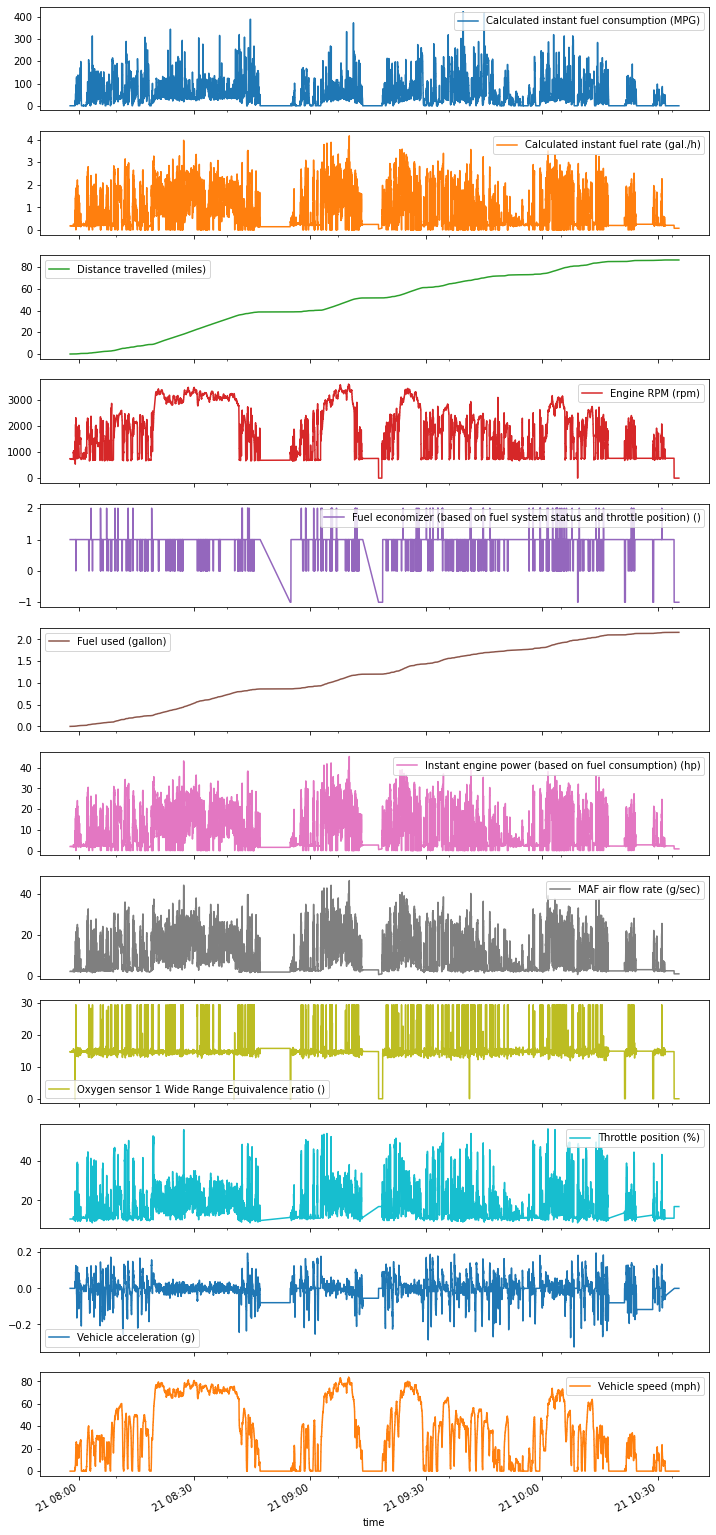

In [3]:
data.plot(subplots=True,figsize=(12,30))
plt.savefig('plt1.png',dpi=300)

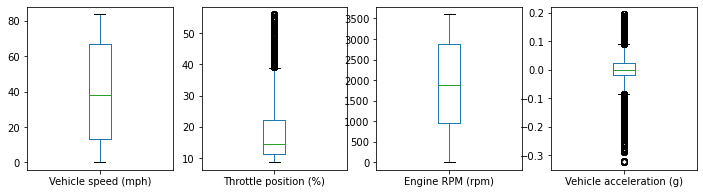

In [4]:
select = ['Vehicle speed (mph)','Throttle position (%)',\
          'Engine RPM (rpm)', 'Vehicle acceleration (g)']
data[select].plot(kind='box', subplots=True, figsize=(12,3))
plt.savefig('plt2.png',dpi=300)

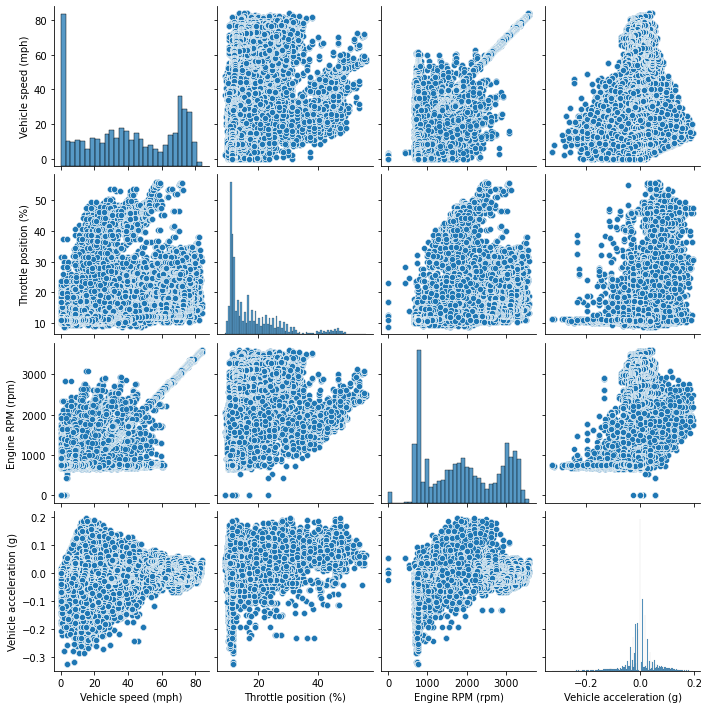

In [5]:
import seaborn as sns
sns.pairplot(data[select])
plt.savefig('plt3.png',dpi=300)

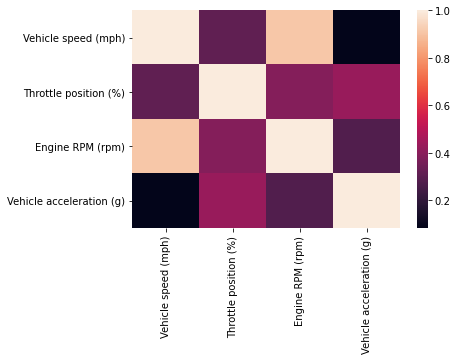

In [6]:
sns.heatmap(data[select].corr())
plt.savefig('plt4.png',dpi=300)

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, explorative=True, minimal=True)
try:
   profile.to_widgets()         # view as widget in Notebook
except:
   profile.to_file('data.html') # save as html file